# Workflow Debugging

(43, 16)
Metal device set to: Apple M1 Pro
Epoch 1/100


2022-04-22 15:51:15.659427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-22 15:51:15.659545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-22 15:51:15.738511: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 253ms/step - loss: 4.6317 - accuracy: 0.2333
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 2.5491 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.6766 - accuracy: 0.3667
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3276 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0880 - accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0188 - accuracy: 0.7000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9542 - accuracy: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8630 - accuracy: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7841 - accuracy: 0.7333
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7647 - accuracy: 0.7667


2022-04-22 15:51:15.890177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7098 - accuracy: 0.7667
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6632 - accuracy: 0.7333
Epoch 13/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.7333
Epoch 14/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6281 - accuracy: 0.7333
Epoch 15/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5927 - accuracy: 0.7333
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5673 - accuracy: 0.8333
Epoch 17/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5611 - accuracy: 0.8667
Epoch 18/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5421 - accuracy: 0.8667
Epoch 19/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5233 - accuracy: 0.8667
Epoch 20/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5153 - accuracy: 0.8333
Epoch 21/100
1/1 [=

1/1 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.9667
Epoch 95/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0766 - accuracy: 0.9667
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0752 - accuracy: 0.9667
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.9667
Epoch 98/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0723 - accuracy: 0.9667
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9667
Epoch 100/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0696 - accuracy: 0.9667
Accuracy on training data: 0.9666666984558105% 
 Error on training data: 0.03333330154418945
1/1 [==============================] - 0s 28ms/step - loss: 10.5326 - accuracy: 0.6154
Accuracy on test data: 0.6153846383094788% 
 Error on test data: 0.38461536169052124


2022-04-22 15:51:17.033834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 15:51:17.164538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


len(y_predicted) 13
qaoa_15  predicted:  2  should be:  1  diff:  999999.8629997703
wstate_15  predicted:  2  should be:  1  diff:  999999.8715110769
graphstate_10  predicted:  1  should be:  2  diff:  0.04092168218597492
grover-noancilla_5  predicted:  2  should be:  0  diff:  1.3997349584647774
vqe_15  predicted:  2  should be:  0  diff:  999999.3098245967


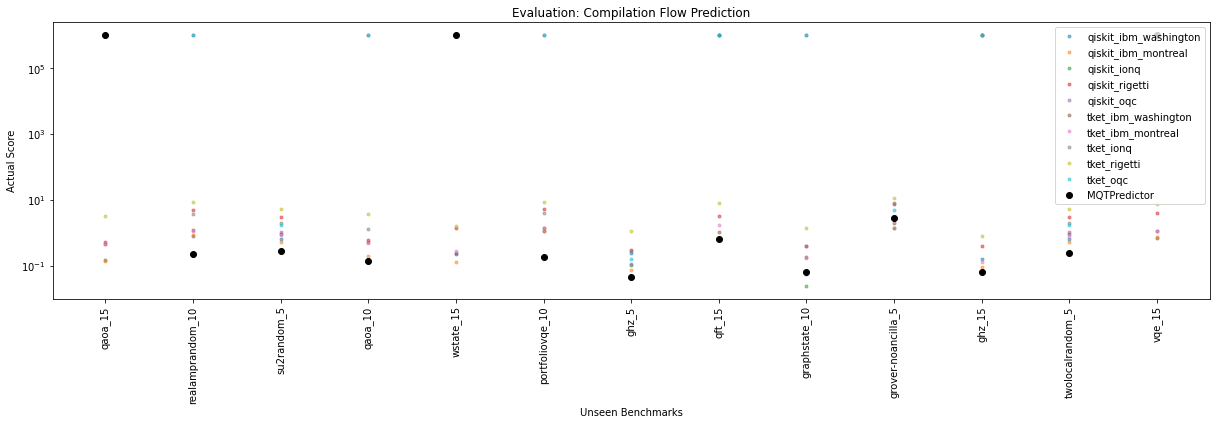

In [5]:
from evaluator.driver import extract_training_data_from_json, train_simple_ml_model
import numpy as np
from sklearn import preprocessing

training_data, names_list, scores_list = extract_training_data_from_json("json_data.json", True)
#print(names_list)
X, y = zip(*training_data)
X = np.array(X)
y = np.array(y)

non_zero_indices = []
for i in range(len(X[0])):
    if sum(X[:,i]) > 0:
        non_zero_indices.append(i)
X = X[:, non_zero_indices]

scaler = preprocessing.StandardScaler().fit(X)
#X = preprocessing.normalize(X, norm='l2')
#X = scaler.transform(X)

print(X.shape)
train_simple_ml_model(X,y, True, names_list, scores_list)

In [6]:
from sklearn.model_selection import train_test_split
from evaluator.src import utils
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

openqasm_gates_list = utils.get_openqasm_gates()
res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
res.append("num_qubits")


features = np.sort(np.array(res))
features = features[non_zero_indices]
print(features)


['ccx' 'cp' 'cu1' 'cx' 'cz' 'h' 'num_qubits' 'p' 'rx' 'ry' 'rzz' 'swap'
 'u1' 'u2' 'u3' 'x']


0.4666666666666667
Predicted machines:  {2}
Actual machines:  {0, 1, 2, 5}
predicted  2  should be  1
predicted  2  should be  1
predicted  2  should be  5
predicted  2  should be  1
predicted  2  should be  0
predicted  2  should be  5
predicted  2  should be  0
predicted  2  should be  1


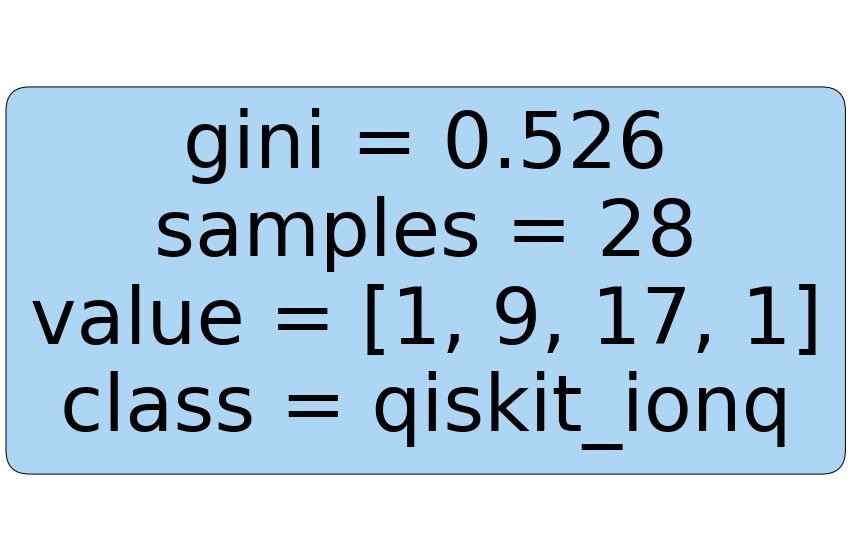

In [7]:
import matplotlib.pyplot as plt
from evaluator.src import utils
from sklearn.tree import plot_tree
from sklearn import tree


clf = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

fig = plt.figure(figsize=(15, 10))

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))
available_machines = [utils.get_machines()[i] for i in set(clf.classes_)]
plot_tree(clf, 
          feature_names=features,
          class_names=available_machines,
          filled=True, impurity=True, 
          rounded=True);
plt.savefig("DecisionTreeClassifier.png", dpi=600)

print("Predicted machines: ", set(y_pred))
print("Actual machines: ", set(y_test))
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print("predicted ", y_pred[i], " should be ", y_test[i])

# Other tested Models

In [4]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.6917293233082706


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier


clf = AdaBoostClassifier(n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.6541353383458647


1 0.8383458646616542
2 0.8533834586466166
3 0.9022556390977443
4 0.8759398496240601
5 0.8872180451127819
6 0.8909774436090225
7 0.8872180451127819
8 0.9135338345864662
9 0.9172932330827067


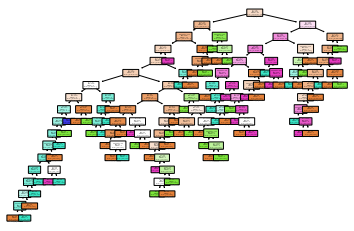

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

#Create a Gaussian Classifier
for i in range(1,10,1):
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print(i, np.mean(y_pred == y_test))
    plot_tree(clf.estimators_[0], 
          feature_names=features,
          class_names=utils.get_machines(),
          filled=True, impurity=True, 
          rounded=True);

In [7]:
from sklearn.svm import SVC
#Create a Gaussian Classifier

clf=SVC(kernel="linear")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.8383458646616542


# Debugging

In [1]:
from evaluator import driver
from evaluator.src import utils, pytket_plugin, qiskit_plugin
import pytest
from pytket.extensions.qiskit import qiskit_to_tk
from mqt.bench import get_one_benchmark
from pytket import circuit, OpType

In [2]:
driver.create_gate_lists_from_folder("./qasm_files", 1)

dict_keys(['ae', 'dj', 'excitedstate', 'ghz', 'graphstate', 'groundstate', 'grover-noancilla', 'grover-v-chain', 'hhl', 'portfolioqaoa', 'portfoliovqe', 'pricingcall', 'pricingput', 'qaoa', 'qft', 'qftentangled', 'qgan', 'qpeexact', 'qpeinexact', 'qwalk-noancilla', 'qwalk-v-chain', 'realamprandom', 'routing', 'shor', 'su2random', 'tsp', 'twolocalrandom', 'vqe', 'wstate'])
ae_indep_2.qasm 2
ae_indep_3.qasm 3


/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


ae_indep_4.qasm 4
ae_indep_5.qasm 5
ae_indep_6.qasm 6
ae_indep_7.qasm 7
Calculation/Generation exceeded timeout limit for  <function get_tket_gates at 0x10f991af0> []
dj_indep_2.qasm 2
dj_indep_3.qasm 3
dj_indep_4.qasm 4
dj_indep_5.qasm 5
dj_indep_6.qasm 6
dj_indep_7.qasm 7
dj_indep_8.qasm 8
dj_indep_9.qasm 9
dj_indep_10.qasm 10
dj_indep_11.qasm 11
dj_indep_12.qasm 12
dj_indep_13.qasm 13
dj_indep_14.qasm 14
dj_indep_15.qasm 15
dj_indep_16.qasm 16
dj_indep_17.qasm 17
Calculation/Generation exceeded timeout limit for  <function get_tket_gates at 0x10f991af0> []
excitedstate_small_indep_4.qasm 4
ghz_indep_2.qasm 2
ghz_indep_3.qasm 3
ghz_indep_4.qasm 4
ghz_indep_5.qasm 5
ghz_indep_6.qasm 6
ghz_indep_7.qasm 7
ghz_indep_8.qasm 8
ghz_indep_9.qasm 9
ghz_indep_10.qasm 10
ghz_indep_11.qasm 11
ghz_indep_12.qasm 12
ghz_indep_13.qasm 13
ghz_indep_14.qasm 14
ghz_indep_15.qasm 15
ghz_indep_16.qasm 16
ghz_indep_17.qasm 17
ghz_indep_18.qasm 18
ghz_indep_19.qasm 19
ghz_indep_20.qasm 20
ghz_indep_21.qasm

Exception ignored in: <generator object iter_fields at 0x2a19d6190>
Traceback (most recent call last):
  File "/Users/nils/miniforge3/envs/tf3/lib/python3.9/ast.py", line 251, in iter_fields
    yield field, getattr(node, field)
  File "/Users/nils/Documents/repos/MQTPredictor/evaluator/driver.py", line 30, in timeout_handler
    raise TimeoutException
evaluator.driver.timeout_watcher.<locals>.TimeoutException: 


KeyboardInterrupt: 